In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load already preprocessed datasets
train_df = pd.read_csv('../results/outputs/train_selected_features.csv')
test_df = pd.read_csv('../results/outputs/test_selected_features.csv')

# Separate features and target
X_train = train_df.drop('LUNG_CANCER', axis=1)
y_train = train_df['LUNG_CANCER']

X_test = test_df.drop('LUNG_CANCER', axis=1)
y_test = test_df['LUNG_CANCER']

# Apply PCA on training set only with dynamic component selection
pca = PCA(n_components=0.95, random_state=42)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train)
n_components = X_train_pca.shape[1]  # Actual number of components selected
X_test_pca = pca.transform(X_test)  # transform test set using the same PCA model


In [3]:
# Explained Variance
print("Explained variance ratio of each component:", pca.explained_variance_ratio_)
print(f"Number of components selected: {n_components}")
print("Total explained variance:", sum(pca.explained_variance_ratio_))


Explained variance ratio of each component: [0.14723544 0.12981223 0.11955976 0.11910259 0.116099   0.1144888
 0.11259301 0.10847154]
Number of components selected: 8
Total explained variance: 0.9673623888350957


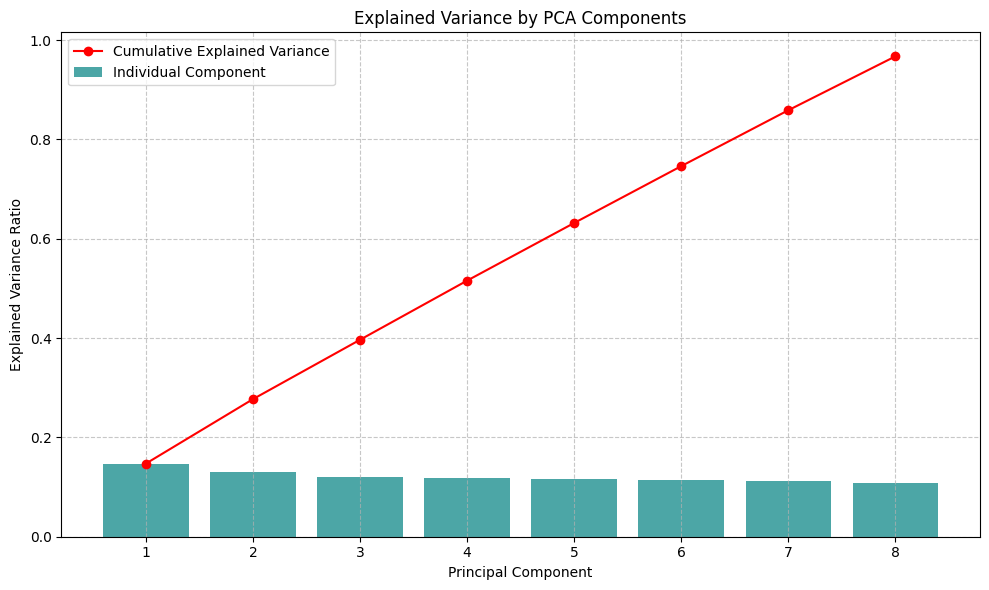

In [4]:
# Visualize Explained Variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components+1), pca.explained_variance_ratio_, alpha=0.7, color='teal')
plt.plot(range(1, n_components+1), pca.explained_variance_ratio_.cumsum(), marker='o', color='red')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, n_components+1))
plt.legend(['Cumulative Explained Variance', 'Individual Component'], loc='best')
plt.grid(True, linestyle='--', alpha=0.7)  # Added grid for better readability
plt.tight_layout()
plt.savefig('../results/eda_visualizations/IT24103547/pca_explained_variance.png')
plt.show()


In [5]:
# Create DataFrames with PCA components + target
pc_columns = [f'PC{i+1}' for i in range(n_components)]
train_pca_df = pd.concat([pd.DataFrame(X_train_pca, columns=pc_columns), y_train.reset_index(drop=True)], axis=1)
test_pca_df = pd.concat([pd.DataFrame(X_test_pca, columns=pc_columns), y_test.reset_index(drop=True)], axis=1)

# Show head of PCA-transformed datasets
print("Head of PCA-transformed TRAIN dataset:\n", train_pca_df.head())
print("\nHead of PCA-transformed TEST dataset:\n", test_pca_df.head())

# Save PCA-transformed datasets
train_pca_df.to_csv('../results/outputs/final_processed_training_dataset.csv', index=False)
test_pca_df.to_csv('../results/outputs/final_processed_testing_dataset.csv', index=False)
print("Saved PCA-transformed train and test datasets to '../results/outputs/'")

Head of PCA-transformed TRAIN dataset:
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.318794  0.564505  0.844575 -0.289957  0.061996 -0.091310 -0.517951   
1  0.059734  0.644551  0.585514  0.615535 -0.125909  0.113648 -0.452626   
2  0.859891  0.461526 -0.173708  0.191952 -0.814229  0.046335 -0.194398   
3 -1.035183  0.681420 -0.030425 -0.026950  0.078273 -0.097199  0.053277   
4  0.205327 -0.484742  0.877410 -0.520561  0.831505  0.430442 -0.228027   

        PC8  LUNG_CANCER  
0  0.618184            1  
1 -0.753639            1  
2 -0.582101            1  
3  0.061224            1  
4 -0.171748            1  

Head of PCA-transformed TEST dataset:
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.866054  0.490389 -0.176185  0.195698 -0.811995  0.040954 -0.194540   
1  0.274670 -0.755911 -0.738061  0.357850 -0.172824 -0.213066  0.799641   
2  0.797339  0.355330  0.104475  0.231330  0.047369 -0.116487 -1.140709   
3  0.26